In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff


import string
import spacy

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
from collections import Counter
from collections import defaultdict

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyagajbhiye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreyagajbhiye/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Obtaining dependency information for joblib from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/60/9e/4b0223e05776aa3be806a902093b2ab1de3ba26b652d92065d5c7e1d4df3/regex-2023.12.25-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 567.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 3.6 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
grammy_data_path = 'Data/grammySongs_1999-2019.csv'
spotify_data_path = 'Data/songAttributes_1999-2019.csv'
billboard_data_path = 'Data/billboardcleaned.csv'
billboard = pd.read_csv(billboard_data_path)
billboard.rename(columns = {'Artists':'Artist'}, inplace = True)


In [4]:
billboard.head()

,Unnamed: 0,Artist,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,cleaned_lyrics
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus,old town road remix oh ohoh oh yeah im gon na ...
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN,senorita love call senorita wish could pretend...
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN,bad guy white shirt red bloody nose sleepin yo...
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN,talk talk talk talk goin get lost lend thought...
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN,dont care im party dont wan na dont ever wear ...


In [5]:
billboard['Artist'] = billboard['Artist'].str.replace(" &", ",")
billboard['Name'] = billboard['Name'].str.lower()
billboard['Artist'] = billboard['Artist'].str.lower()
billboard['BillboardYear'] = pd.to_datetime(billboard['Week'])
billboard['BillboardYear'] = billboard['BillboardYear'].dt.year
lyrics = billboard.groupby(['Name', 'Artist','BillboardYear'], as_index = False).agg({'cleaned_lyrics' : 'first'})

In [6]:
decade_one_df = lyrics[(lyrics['BillboardYear']>=1999) & (lyrics['BillboardYear']<2010)]
decade_two_df = lyrics[lyrics['BillboardYear']>=2010]
decade_one_df_lyrics = decade_one_df.groupby(['Name', 'Artist','cleaned_lyrics'], as_index = False).agg({'BillboardYear' : 'first'})
decade_two_df_lyrics = decade_two_df.groupby(['Name', 'Artist','cleaned_lyrics'], as_index = False).agg({'BillboardYear' : 'first'})
decade_one_df_lyrics.sort_values(by='BillboardYear',ascending=True,inplace=True)
decade_two_df_lyrics.sort_values(by='BillboardYear',ascending=False,inplace=True)
lyrics_decade_one = " ".join(decade_one_df_lyrics['cleaned_lyrics'][:30])
lyrics_decade_two = " ".join(decade_two_df_lyrics['cleaned_lyrics'][:60])

In [8]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
nlp = spacy.load("en_core_web_sm")

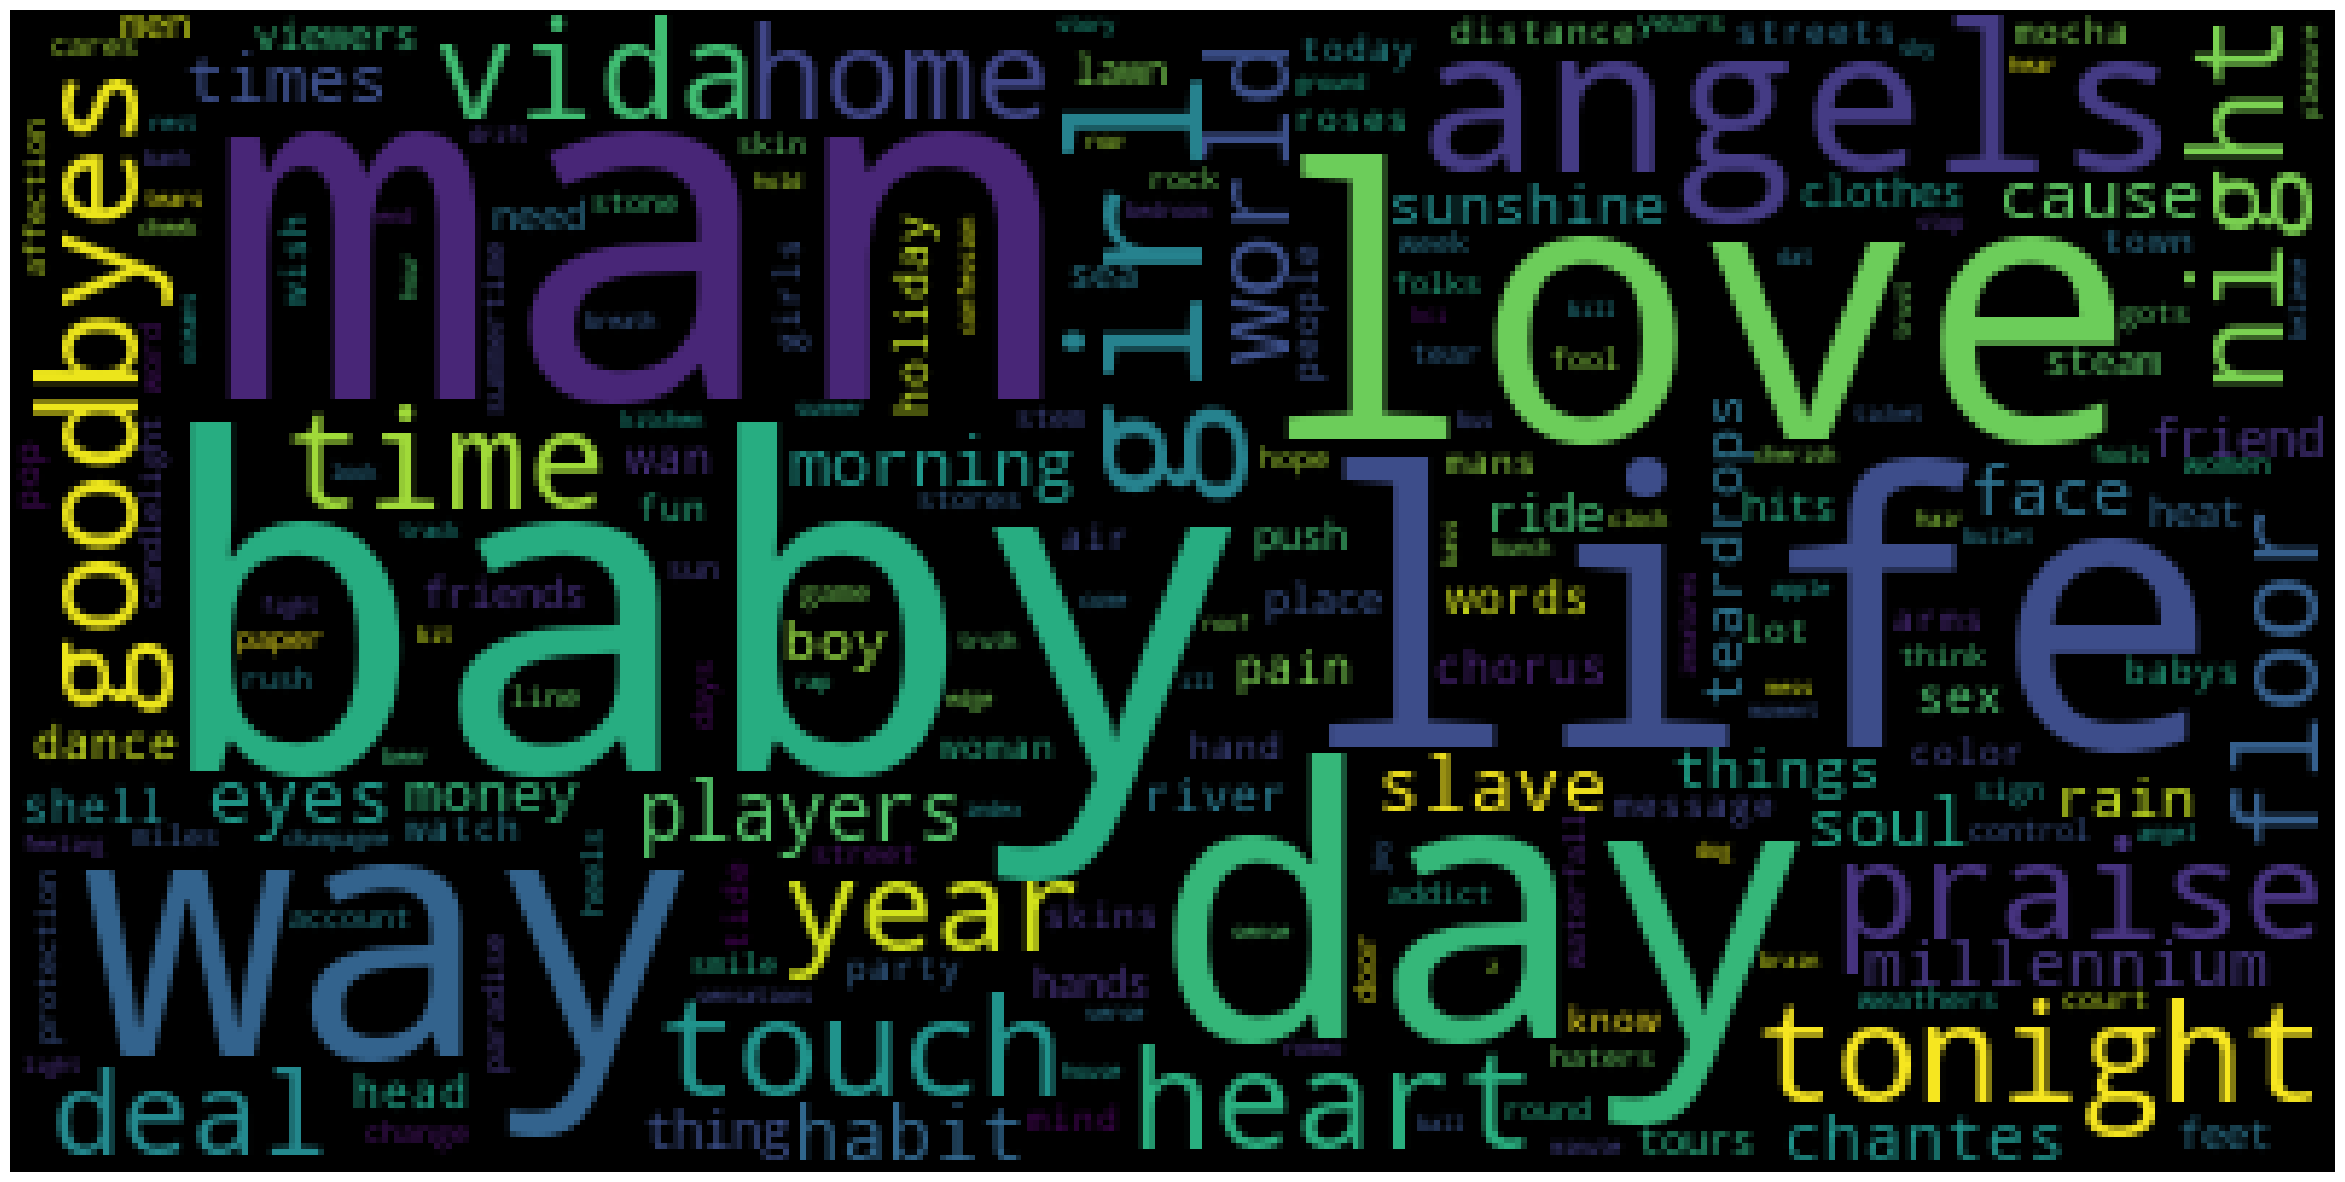

In [10]:
doc_noun_decade_1 = nlp(lyrics_decade_one)

words_decade_1 = [token.text for token in doc_noun_decade_1
         if token.is_stop != True and token.is_punct != True
         and token.pos_=='NOUN']

word_cnt_decade_1 = Counter(words_decade_1)
wordcloud1 = WordCloud().generate_from_frequencies(word_cnt_decade_1)
wordcloud1

plt.figure(figsize = (30, 20))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

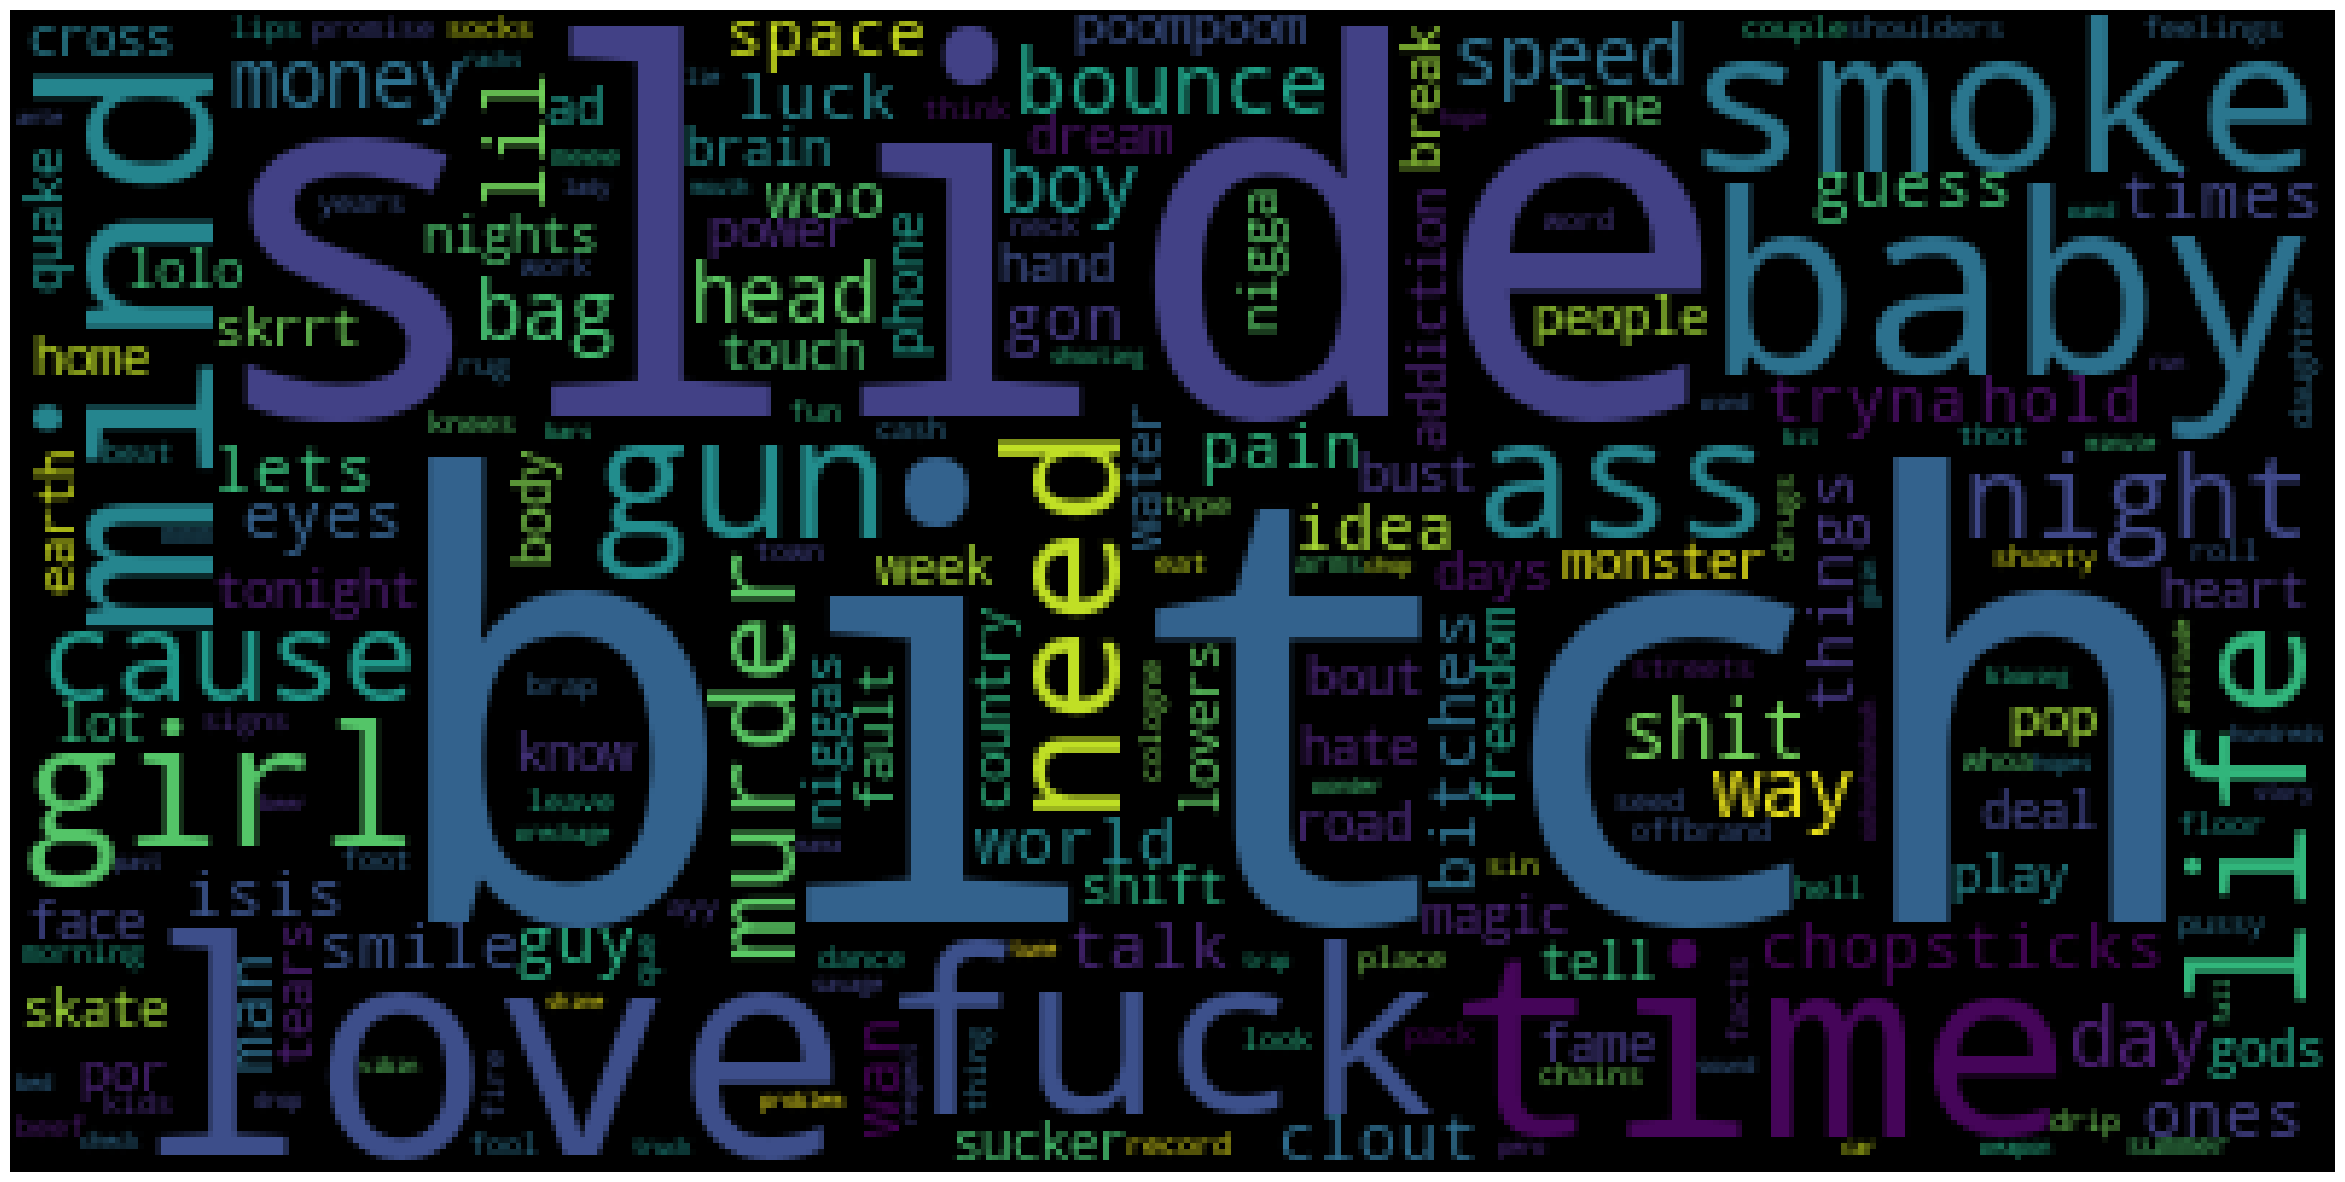

In [11]:
doc_noun_decade_2 = nlp(lyrics_decade_two)

words_decade_2 = [token.text for token in doc_noun_decade_2
         if token.is_stop != True and token.is_punct != True
         and token.pos_=='NOUN']

word_cnt_decade_2 = Counter(words_decade_2)
wordcloud2 = WordCloud().generate_from_frequencies(word_cnt_decade_2)
wordcloud2

plt.figure(figsize = (30, 20))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [12]:

spotify = pd.read_csv(spotify_data_path)
spotify['Artist'] = spotify['Artist'].str.strip("[]")
spotify['Artist'] = spotify['Artist'].str.replace("'", "").str.replace(" &", ",")
spotify.rename(columns = {'name':'Name'}, inplace = True)
spotify['Name'] = spotify['Name'].str.lower()
spotify['Artist'] = spotify['Artist'].str.lower()
spotify['Duration'] = spotify['Duration']/1000

In [13]:
songs = spotify.groupby(['Name', 'Artist'], as_index = False).agg({'Acousticness' : 'mean', 'Danceability' : 'mean', 'Duration' : 'mean', 'Energy' : 'mean', 'Explicit' : 'max', 'Instrumentalness' : 'mean',  'Liveness' : 'mean',  'Loudness' : 'mean',  'Mode' : 'max', 'Popularity' : 'sum', 'Speechiness' : 'mean', 'Tempo' : 'mean', 'Valence' : 'mean'})
bb1 = billboard.groupby(['Name', 'Artist', 'Week', 'Weekly.rank','BillboardYear'], as_index = False).agg({'Weeks.on.chart' : 'max', 'Peak.position' : 'min', 'Genre' : 'first', 'Date':'first'})
bb1 = bb1.merge(songs, on = ['Name', 'Artist'])
bb2 = bb1.groupby(['Name','Artist'], as_index = False).agg({'Weeks.on.chart' : 'max', 'Peak.position' : 'min'})
bb2 = bb2.dropna(subset = ['Peak.position', 'Weeks.on.chart'])
bb3 = bb1.groupby(['Name','Artist'], as_index = False).agg({'Acousticness' : 'mean', 'Danceability' : 'mean', 'Duration' : 'mean', 'Energy' : 'mean', 'Explicit' : 'max', 'Instrumentalness' : 'mean',  'Liveness' : 'mean',  'Loudness' : 'mean',  'Mode' : 'max', 'Speechiness' : 'mean', 'Tempo' : 'mean', 'Valence' : 'mean','Genre' : 'first', 'Popularity' : 'max', 'Date':'first'})

In [15]:
bb3.head()

,Name,Artist,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Genre,Popularity,Date
0,...ready for it?,taylor swift,0.052700,0.613000,208.187000,0.764000,False,0.000000,0.197000,-6.509,1,0.136000,160.015,0.417000,"Electronic,Electro-Pop,Pop",70,"September 3, 2017"
1,1 thing,amerie,0.115667,0.622667,239.475333,0.962333,False,0.000065,0.034133,-3.452,0,0.308667,127.671,0.858667,"Pop,R&;B",6,"January 5, 2005"
2,10 bands,drake,0.230000,0.835000,177.733000,0.756000,True,0.000000,0.080100,-3.789,1,0.382000,173.000,0.870000,"Trap,Canada,Rap",66,"February 13, 2015"
3,100,the game,0.013600,0.801000,334.360000,0.521000,True,0.000000,0.179000,-9.871,0,0.280000,108.025,0.412000,"Trap,Canada,West Coast,Rap",25,"June 25, 2015"
4,100 grandkids,mac miller,0.371000,0.735000,278.507000,0.749000,True,0.000000,0.470000,-3.766,0,0.087400,93.718,0.373000,Rap,65,"August 7, 2015"


[Text(0.5, 0, 'Acousticness'),
 Text(1.5, 0, 'Danceability'),
 Text(2.5, 0, 'Duration'),
 Text(3.5, 0, 'Energy'),
 Text(4.5, 0, 'Explicit'),
 Text(5.5, 0, 'Instrumentalness'),
 Text(6.5, 0, 'Liveness'),
 Text(7.5, 0, 'Loudness'),
 Text(8.5, 0, 'Mode'),
 Text(9.5, 0, 'Speechiness'),
 Text(10.5, 0, 'Tempo'),
 Text(11.5, 0, 'Valence'),
 Text(12.5, 0, 'Popularity')]

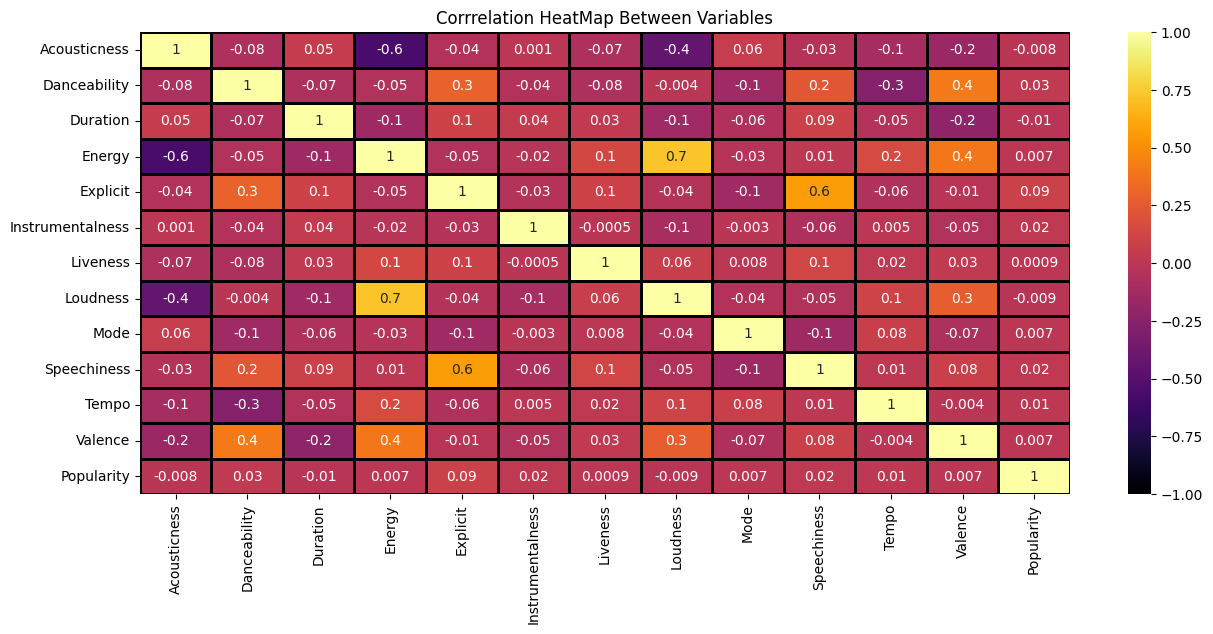

In [16]:
corr_df = bb3.drop(["Name", "Artist", "Genre","Date"], axis = 1).corr(method = "pearson")

plt.figure(figsize = (15,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths = 1, linecolor="Black")
heatmap.set_title("Corrrelation HeatMap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

In [17]:
bb1.head()

,Name,Artist,Week,Weekly.rank,BillboardYear,Weeks.on.chart,Peak.position,Genre,Date,Acousticness,...,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Valence
0,...ready for it?,taylor swift,2017-09-23,4,2017,NaN,NaN,"Electronic,Electro-Pop,Pop","September 3, 2017",0.0527,...,0.764,False,0.0,0.197,-6.509,1,70,0.136,160.015,0.417
1,...ready for it?,taylor swift,2017-09-30,21,2017,2.0,4.0,"Electronic,Electro-Pop,Pop","September 3, 2017",0.0527,...,0.764,False,0.0,0.197,-6.509,1,70,0.136,160.015,0.417
2,...ready for it?,taylor swift,2017-10-07,34,2017,3.0,4.0,"Electronic,Electro-Pop,Pop","September 3, 2017",0.0527,...,0.764,False,0.0,0.197,-6.509,1,70,0.136,160.015,0.417
3,...ready for it?,taylor swift,2017-10-14,39,2017,4.0,4.0,"Electronic,Electro-Pop,Pop","September 3, 2017",0.0527,...,0.764,False,0.0,0.197,-6.509,1,70,0.136,160.015,0.417
4,...ready for it?,taylor swift,2017-10-21,47,2017,5.0,4.0,"Electronic,Electro-Pop,Pop","September 3, 2017",0.0527,...,0.764,False,0.0,0.197,-6.509,1,70,0.136,160.015,0.417


In [18]:
Yearly_Billboard_Trends = bb1.groupby(['BillboardYear'], as_index = False).agg({'Acousticness' : 'mean', 'Danceability' : 'mean', 'Duration' : 'mean', 'Energy' : 'mean', 'Explicit' : 'max', 'Instrumentalness' : 'mean',  'Liveness' : 'mean',  'Loudness' : 'mean',  'Mode' : 'max', 'Popularity' : 'max', 'Speechiness' : 'mean', 'Tempo' : 'mean', 'Valence' : 'mean'})

In [19]:
figure=px.bar(Yearly_Billboard_Trends, x='BillboardYear', y='Danceability', title='Danceability Trend Over Years',color='Energy')
figure

In [20]:
genre = bb1.groupby(['Name', 'Artist'], as_index=False).agg({'Acousticness': 'mean', 'Danceability' : 'mean', 'Duration' : 'mean', 'Energy' : 'mean', 'Explicit': 'max', 'Instrumentalness': 'mean', 'Liveness': 'mean',  'Loudness': 'mean',  'Mode': 'max', 'Popularity': 'mean', 'Speechiness': 'mean', 'Tempo': 'mean', 'Valence': 'mean', 'Genre' : 'first', 'Date':'first'})

data = genre # Replace with your file path

# Extract year and split genres
data.dropna(inplace=True)
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Genres'] = data['Genre'].str.split(',')

# Count genre occurrences per year
genre_counts_per_year = defaultdict(lambda: defaultdict(int))
for _, row in data.iterrows():
    year = row['Year']
    genres = row['Genres']
    if genres is not None:
        for genre in genres:
            genre_counts_per_year[genre][year] += 1

# Determine the top 10 genres
all_genres = {genre for genres in data['Genres'] for genre in genres}
top_10_genres = sorted(all_genres, key=lambda x: sum(genre_counts_per_year[x].values()), reverse=True)[:10]

# Create the heatmap data matrix
years = sorted(data['Year'].unique())
heatmap_data = np.zeros((len(years), len(top_10_genres)))

for i, year in enumerate(years):
    for j, genre in enumerate(top_10_genres):
        heatmap_data[i, j] = genre_counts_per_year[genre][year]

# Create the heatmap DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=years, columns=top_10_genres)

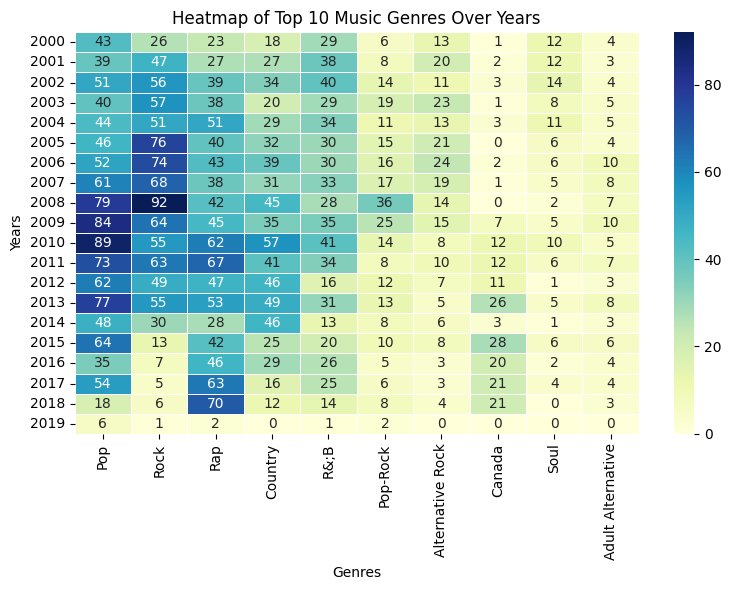

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5,)

# Adding labels and title
plt.title('Heatmap of Top 10 Music Genres Over Years')
plt.xlabel('Genres')
plt.ylabel('Years')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
genere = bb1.groupby(['Name', 'Artist'], as_index=False).agg({'Acousticness': 'mean', 'Danceability' : 'mean', 'Duration' : 'mean', 'Energy' : 'mean', 'Explicit': 'max', 'Instrumentalness': 'mean', 'Liveness': 'mean',  'Loudness': 'mean',  'Mode': 'max', 'Popularity': 'mean', 'Speechiness': 'mean', 'Tempo': 'mean', 'Valence': 'mean', 'Genre' : 'first', 'Date':'first'})

In [23]:
data = bb3.copy()

# List of numerical song attributes
song_attributes = data.select_dtypes(include='number').columns.tolist()

#get year from date
genere['Song by Artist'] = genere['Name'] + ' by ' + genere['Artist']
genere.dropna(inplace=True)
# create a year column
genere['Year'] = pd.to_datetime(genere['Date']).dt.year
years = genere['Year'].astype(str).apply(lambda x: x.split('-')[0]).unique()  # Extracting year from the date
genere_list = np.unique(np.concatenate(genere['Genre'].apply(lambda x: x.split(',')).values))

artists = genere['Song by Artist'].unique()
genere['Acousticness'] = (genere['Acousticness'] - genere['Acousticness'].min()) / (genere['Acousticness'].max() - genere['Acousticness'].min())
genere['Danceability'] = (genere['Danceability'] - genere['Danceability'].min()) / (genere['Danceability'].max() - genere['Danceability'].min())
genere['Energy'] = (genere['Energy'] - genere['Energy'].min()) / (genere['Energy'].max() - genere['Energy'].min())
genere['Instrumentalness'] = (genere['Instrumentalness'] - genere['Instrumentalness'].min()) / (genere['Instrumentalness'].max() - genere['Instrumentalness'].min())
genere['Liveness'] = (genere['Liveness'] - genere['Liveness'].min()) / (genere['Liveness'].max() - genere['Liveness'].min())
genere['Speechiness'] = (genere['Speechiness'] - genere['Speechiness'].min()) / (genere['Speechiness'].max() - genere['Speechiness'].min())
genere['Valence'] = (genere['Valence'] - genere['Valence'].min()) / (genere['Valence'].max() - genere['Valence'].min())
genere['Loudness'] = (genere['Loudness'] - genere['Loudness'].min()) / (genere['Loudness'].max() - genere['Loudness'].min())
genere['Tempo'] = (genere['Tempo'] - genere['Tempo'].min()) / (genere['Tempo'].max() - genere['Tempo'].min())
genere['Loudness'] = (genere['Loudness'] - genere['Loudness'].min()) / (genere['Loudness'].max() - genere['Loudness'].min())
genere['Popularity'] = (genere['Popularity'] - genere['Popularity'].min()) / (genere['Popularity'].max() - genere['Popularity'].min())

In [24]:
import plotly.graph_objects as go
import pandas as pd


# Filter data for Taylor Swift
artist_data = billboard[billboard['Artist'].str.contains('adele', case=False, na=False)]
artist_data['Week'] = pd.to_datetime(artist_data['Week'])
# artist_data = artist_data[(artist_data['Week'].dt.year >= 2010) & (artist_data['Week'].dt.year <= 2014)]
artist_data = artist_data[
    (artist_data['Week'].dt.year >= 2010) &
    ((artist_data['Week'].dt.year < 2012) | ((artist_data['Week'].dt.year == 2012) & (artist_data['Week'].dt.month <= 7)))
]


# Sort data
artist_data.sort_values(by='Week', inplace=True)

# Unique weeks and songs
unique_weeks = artist_data['Week'].unique()
unique_songs = artist_data['Name'].unique()


# Initialize the figure and frames list
fig_adele = go.Figure()
frames = []
frame_data = []

# Create a frame for each week
for week in unique_weeks:
    week_data = artist_data[artist_data['Week'] <= week]
    frame_data = []
    for song in unique_songs:
        song_week_data = week_data[week_data['Name'] == song]
        frame_data.append(go.Scatter(
            x=song_week_data['Week'],
            y=song_week_data['Weekly.rank'],
            mode='lines+markers',
            name=song,
            hovertemplate='%{x}: %{y} <br>Song: %{text}',
            text=song_week_data['Name']

        ))

    frames.append(go.Frame(data=frame_data))

# Define play and pause buttons for animation
play_button = {
    "type": "buttons",
    "buttons": [
        {
            "label": "Play",
            "method": "animate",
            "args": [None, {"frame": {"duration": 200, "redraw": True}, "fromcurrent": True}],
        },
        {
            "label": "Pause",
            "method": "animate",
            "args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
        },
    ],
    "direction": "left",
    "pad": {"r": 10, "t": 87},
    "showactive": True,
    "x": 0.1,
    "xanchor": "right",
    "y": 0,
    "yanchor": "top"
}

# Set the initial layout of the figure
fig_adele.update_layout(
    xaxis=dict(title='Date', type='date',tickfont=dict(size=14),
            title_font=dict(size=16)),
    yaxis=dict(title='Weekly Chart Rank', autorange='reversed',tickfont=dict(size=14),
            title_font=dict(size=16)),
    title='Billboard Chart Performance of Adele Over Time',
    title_x=0.5,
    title_font=dict(size=20),
    updatemenus=[play_button],
    showlegend=True
)

# Add the initial data (first frame) to the figure
fig_adele.add_traces(frames[0].data)

# Add all the frames to the figure
fig_adele.frames = frames



In [26]:
song_data = pd.read_csv('./Data/trending_songs_data.csv')
song_data['constant']=1
song_data = song_data.sort_values(by='total_years_song_repeated', ascending=True)
song_data = song_data[song_data['total_years_song_repeated']>=3]

In [27]:
fig_trend_song = px.bar(song_data, x='constant', y='Name',
             color='song_repeated_in_one_year_count',
             labels={'Name': 'Song Name', 'constant': 'Number of Years Repeated','song_repeated_in_one_year_count':'No. of Weeks'},
            hover_data={'Artist':True,'year_in_which_song_repeated':True,'total_years_song_repeated':True,'Genre':True})
fig_trend_song.update_layout(width=680,height=700)

In [38]:
grammy = pd.read_csv(grammy_data_path)

grammy['Artist'] = grammy['Artist'].str.replace(" &", ",")
grammy['Name'] = grammy['Name'].str.lower()
grammy['Artist'] = grammy['Artist'].str.lower()

gr = grammy.merge(songs, on = ['Name', 'Artist'])
gr = gr.drop(columns = 'Unnamed: 0').drop(columns = 'X')

gr['Name'] = gr['Name'].str.title()
gr['Artist'] = gr['Artist'].str.title()

In [41]:
bb_gr = bb3.merge(grammy, on = ['Name','Artist'])
# bb_gr = bb_gr.groupby(['Name','Artist','GrammyYear'], as_index = False).agg({'Genre_y':'last','Date':'first'})

In [42]:
bb_gr

,Name,Artist,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,...,Tempo,Valence,Genre_x,Popularity,Date,Unnamed: 0,X,GrammyAward,GrammyYear,Genre_y
0,24k magic,bruno mars,0.034000,0.818000,225.983000,0.803000,False,0.000000,0.153,-4.282000,...,106.970000,0.632000,"Funk-Pop,Funk,Pop",79,"October 7, 2016",24,23,Record Of The Year,2017,General
1,a milli,lil wayne,0.038700,0.673000,221.840000,0.695000,True,0.002060,0.194,-8.636000,...,151.468000,0.774000,"Crunk,Rap",114,"April 23, 2008",226,225,Best Rap Solo Performance,2008,Rap
2,adorn,miguel,0.054300,0.625000,193.147000,0.576000,False,0.000041,0.187,-5.693000,...,179.063000,0.235000,"Pop,Neo Soul,Singer-Songwriter,Trip-Hop,Soul,S...",34,"February 28, 2012",142,141,Best R&B Song,2012,R&B
3,ain't it fun,paramore,0.154000,0.610000,296.520000,0.893000,False,0.000044,0.021,-3.681000,...,104.031000,0.673000,"Adult Alternative,Adult Contemporary,Alternati...",122,"April 9, 2013",99,98,Best Rock Song,2014,Rock
4,ain't no other man,christina aguilera,0.003585,0.859000,228.767000,0.731500,False,0.007080,0.118,-5.153500,...,127.931500,0.506000,"R&;B,Funk,Pop",106,"June 6, 2006",255,254,Best Female Pop Vocal Performance,2006,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,white horse,taylor swift,0.316000,0.578000,235.153500,0.348500,False,0.000000,0.100,-8.045500,...,92.513500,0.232500,"Pop Country,Ballad,Country,Pop",53,"December 7, 2008",209,208,Best Country Song,2009,Country
130,who let the dogs out,baha men,0.055367,0.813667,196.057667,0.864667,False,0.000239,0.317,-4.588333,...,129.136333,0.800333,Rap,121,"July 26, 2000",394,393,Best Dance Recording,2000,Pop
131,with arms wide open,creed,0.004250,0.410000,274.800000,0.539000,False,0.000890,0.117,-8.412000,...,138.852000,0.141000,Rock,65,None,400,399,Best Rock Song,2000,Rock
132,you don't know my name,alicia keys,0.589000,0.263000,366.733000,0.663000,False,0.004510,0.342,-8.264000,...,167.271000,0.250000,"R&;B,Rap",62,"November 18, 2003",312,311,Best R&B Song,2004,R&B


In [43]:
artists_songs_grammy = list(bb_gr[['Name','Artist']].value_counts().keys())
for artist_song in artists_songs_grammy:
    artist_name = artist_song[1]
    song_name = artist_song[0]
    while (bb_gr['Genre_y'][(bb_gr['Artist'] == artist_name) & (bb_gr['Name'] == song_name)].isin(['General', 'Dance/Electronic Music'])).any():
        replace_genre = bb_gr.loc[(bb_gr['Artist'] == artist_name) & (bb_gr['Name'] == song_name), 'Genre_y'].mode().iloc[0]
        if replace_genre !='General' and replace_genre !='Dance/Electronic Music':    
            bb_gr.loc[(bb_gr['Artist'] == artist_name) & (bb_gr['Name'] == song_name) & 
                     (bb_gr['Genre_y'].isin(['General', 'Dance/Electronic Music'])), 'Genre_y'] = replace_genre
        elif replace_genre =='General' or replace_genre =='Dance/Electronic Music':
            alternate_genre = bb_gr['Genre_x'][(bb_gr['Artist'] == artist_name) & (bb_gr['Name'] == song_name)].mode().iloc[0]
            if ',' in alternate_genre:
                if 'Pop' in alternate_genre:
                    bb_gr.loc[(bb_gr['Artist'] == artist_name) & (bb_gr['Name'] == song_name) & 
                     (bb_gr['Genre_y'].isin(['General', 'Dance/Electronic Music'])), 'Genre_y'] = 'Pop'
                elif 'Rock' in alternate_genre:
                    bb_gr.loc[(bb_gr['Artist'] == artist_name) & (bb_gr['Name'] == song_name) & 
                     (bb_gr['Genre_y'].isin(['General', 'Dance/Electronic Music'])), 'Genre_y'] = 'Rock'
            else:
                bb_gr.loc[(bb_gr['Artist'] == artist_name) & (bb_gr['Name'] == song_name) & 
                     (bb_gr['Genre_y'].isin(['General', 'Dance/Electronic Music'])), 'Genre_y'] = alternate_genre          

In [46]:
pop_songs = bb_gr[['Name','Artist']].value_counts().reset_index()
pop_songs.rename(columns={'count':'count_grammy'},inplace=True)
df_merged = pd.merge(bb_gr, pop_songs[['Name', 'Artist', 'count_grammy']], on=['Name', 'Artist'], how='left', suffixes=('', '_new'))

In [47]:
pop_songs.head()

,Name,Artist,count_grammy
0,that's what i like,bruno mars,3
1,rehab,amy winehouse,3
2,hello,adele,3
3,need you now,lady antebellum,3
4,don't know why,norah jones,3


In [48]:
color_scale = ['orange','darkblue','darkolivegreen','turquoise','magenta']
fig_grammy_trend = px.bar(df_merged, 
             y='Artist', 
             color='Genre_y', 
             hover_data={'Genre_y': True, 'Date': True, 'GrammyYear': True, 'Name': True,'count_grammy':True}, 
             labels={'count': 'Number of Grammy Awards Won','count_grammy': 'Number of Awards won for the song','Genre_y':'Genre'},
             color_discrete_sequence=color_scale)
fig_grammy_trend.update_layout(width=700,height=700)

In [54]:
peak_positions = bb1[bb1['Weekly.rank'] == bb1['Peak.position']]
pk = peak_positions[peak_positions['Peak.position'] < 40]
pk['Genre'].value_counts()
pk['Genre']=pk['Genre'].str.split(',')
genres_exploded_2=pk.explode('Genre')
genres_exploded_2['Genre']=genres_exploded_2['Genre'].str.strip()
genre_counts_2 = genres_exploded_2['Genre'].value_counts()
top_10_genres_2 = genre_counts_2.head(10)
top_genres_counts_2 = genres_exploded_2['Genre'].value_counts().head(5)
filtered_genres_2=genres_exploded_2[genres_exploded_2['Genre'].isin(top_genres_counts_2.index)]
filtered_genres_2['Week'] = pd.to_datetime(filtered_genres_2['Week'])
genre_week_2= filtered_genres_2.groupby(['Week', 'Genre']).size().reset_index(name='Count')
genre_week_pivot_2 = genre_week_2.pivot(index='Week', columns='Genre', values='Count').fillna(0)
genre_week_pivot_2=genre_week_pivot_2.reset_index()
genre_week_2['Week'] = pd.to_datetime(genre_week_2['Week'])
genre_week_pivot_2['Year'] = genre_week_pivot_2['Week'].dt.year
yearly_counts_2 = genre_week_pivot_2.groupby('Year').sum().reset_index()

TypeError: datetime64 type does not support sum operations

In [55]:
pk=filtered_genres_2.groupby(['Artist', 'Genre'])['Week'].agg(['min', 'max'])
pk['min'] = pd.to_datetime(pk['min'])
pk['max'] = pd.to_datetime(pk['max'])
pk['Duration'] = pk['max'] - pk['min']
pk_sorted = pk.sort_values(by='Duration', ascending=False)
top = pk_sorted.head(20)

In [56]:
end_2008 = pd.Timestamp('2008-12-31')
start_2009 = pd.Timestamp('2009-01-01')
art1 = pk[pk['max'] <= end_2008]
art2 = pk[pk['min'] >= start_2009]
art1_sorted=art1.sort_values(by='Duration', ascending=False)
art2_sorted=art2.sort_values(by='Duration', ascending=False)
top_art1=art1_sorted.head(20)#top artists for decade1
top_art2=art2_sorted.head(20)#top artists for decade 2

In [57]:
top['min'] = pd.to_datetime(top['min'])
top['max'] = pd.to_datetime(top['max'])
top_reset = top.reset_index()
import plotly.graph_objects as go

import plotly.graph_objects as go
genre_color_map = {
    'Country': '#1f77b4',  # Muted blue
    'Pop': '#ff7f0e',      # Safety orange
    'R&;B': '#2ca02c',      # Cooked asparagus green
    'Rap': '#d62728',      # Brick red
    'Rock': '#9467bd',     # Muted purple
}


# Create figure
fig_full = go.Figure()
legend_added = {genre: False for genre in genre_color_map.keys()}

# Add a line for each artist
for i, row in top_reset.iterrows():
    genre_color = genre_color_map.get(row['Genre'], 'grey')
    show_legend = not legend_added[row['Genre']]
    legend_added[row['Genre']] = True
    fig_full.add_trace(go.Scatter(
        x=[row['min'].year, row['max'].year],
        y=[row['Artist'], row['Artist']],
        mode='lines+markers',
        name=row['Genre'],
        legendgroup=row['Genre'],  # Use genre as legend group
        showlegend=show_legend,
        #text=f"{row['Artist']}<br>{row['Duration'].days} days",
        hovertext=f"{row['Artist']}<br>Start: {row['min'].date()}<br>End: {row['max'].date()}<br>Duration: {row['Duration'].days} days<br>Genre:{row['Genre']}",
        textposition="bottom center",
        line=dict(width=2, color=genre_color),
        marker=dict(size=10, color=genre_color),
        hoverinfo='text',

    ))

# Update layout to adjust the look and feel of the plot
fig_full.update_layout(
    title='Top 20 Artists\' Golden Era (1999-2019) with genres',
    title_x=0.5,
    title_font=dict(size=20),
    xaxis=dict(
        title='Year',
        showgrid=True,  # Hide the x-axis grid lines
        showline=True,
        tickmode='linear',
        title_font=dict(size=16),
        #tickfont=dict(size=14),
        range=[1998, 2020]  # Set the range for x-axis to cover the years of interest
    ),
    yaxis=dict(
        title='Artist',
        showgrid=False,  # Only show the grid lines for the y-axis
        gridcolor='white',
        autorange='reversed',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        automargin=True  # Automatically adjust the margin to fit the artist names
    ),
    hovermode='closest',  # Show hover for the closest point
    legend_title='Genre',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    showlegend=True,
    height=700,
    width=1200
  
)

# Show figure
fig_full.show()

In [58]:
data

,Name,Artist,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,Valence,Genre,Popularity,Date
0,...ready for it?,taylor swift,0.052700,0.613000,208.187000,0.764000,False,0.000000,0.197000,-6.509,1,0.136000,160.015,0.417000,"Electronic,Electro-Pop,Pop",70,"September 3, 2017"
1,1 thing,amerie,0.115667,0.622667,239.475333,0.962333,False,0.000065,0.034133,-3.452,0,0.308667,127.671,0.858667,"Pop,R&;B",6,"January 5, 2005"
2,10 bands,drake,0.230000,0.835000,177.733000,0.756000,True,0.000000,0.080100,-3.789,1,0.382000,173.000,0.870000,"Trap,Canada,Rap",66,"February 13, 2015"
3,100,the game,0.013600,0.801000,334.360000,0.521000,True,0.000000,0.179000,-9.871,0,0.280000,108.025,0.412000,"Trap,Canada,West Coast,Rap",25,"June 25, 2015"
4,100 grandkids,mac miller,0.371000,0.735000,278.507000,0.749000,True,0.000000,0.470000,-3.766,0,0.087400,93.718,0.373000,Rap,65,"August 7, 2015"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,your side of the bed,little big town,0.676000,0.610000,221.680000,0.383000,False,0.000000,0.094900,-7.543,1,0.032200,137.766,0.164000,"Country,Rock",48,"April 8, 2013"
3484,yours if you want it,rascal flatts,0.010200,0.544000,206.827000,0.903000,False,0.000000,0.108000,-3.151,1,0.053500,113.012,0.408000,Country,35,"January 6, 2017"
3485,youth of the nation,p.o.d.,0.008340,0.563000,256.240000,0.860000,False,0.010600,0.390000,-7.533,1,0.062100,97.867,0.517000,"Alternative Rock,Alternative Metal,Rap Rock,Ro...",72,"December 25, 2001"
3486,yuck!,2 chainz,0.652000,0.600000,287.573000,0.882000,True,0.000236,0.146000,-4.385,0,0.292000,149.966,0.423000,Rap,35,"August 14, 2012"


# Dash Code

In [59]:
import dash
from dash import html, dcc
import dash_bootstrap_components as dbc

# Assuming you have already loaded 'wordcloud1', 'wordcloud2', 'corr_df', and 'Yearly_Billboard_Trends'

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row(
        dbc.Col(
            html.H1(children='Charting the Evolution of Music Trend'),
            # width={'size': 8, 'offset': 3},
            style={'text-align': 'center', 'margin-top':'20px', 'margin-bottom':'20px'}
        )
    ),
    
    dbc.Row([
        dbc.Col(
            html.H3("Popular Songs Over 2 Decades"),
            width=6,
            style={'text-align': 'center'}
        ),
        dbc.Col(
            html.H3("Popular Award winning Artist Over 2 Decades"),
            width=6,
            style={'text-align': 'center'}
        )]
    ),
    dbc.Row([
    # First Chart: Song Trends
    dbc.Col(
        dcc.Graph(
            id='bar-chart',
            figure=fig_trend_song,
            
        ),
        width=6  # Half width
    ),

    # Second Chart: Grammy Trends
    dbc.Col(
        dcc.Graph(
            id='bar-chart_grammy',
            figure=fig_grammy_trend
        ),
        width=6,  # Half width
    ),
]),

    dbc.Row(
        dbc.Col(
            dcc.Graph(
            id='adele-chart',
            figure=fig_adele
        )
        )
    ),

    dbc.Row(
        dbc.Col(
            html.H2("Trends in Genres over the Years"),
            width=12,
            style={'text-align': 'center'}
        )
    ),
    
    dbc.Row(
        dbc.Col(    
        dcc.Graph(
        id='heatmap-graph',
        figure=px.imshow(heatmap_df.values,
                         x=heatmap_df.columns,
                         y=heatmap_df.index,
                         labels={'x': 'Genres', 'y': 'Year'},
                         color_continuous_scale='YlGnBu',
                         text_auto=True,
                         height=600)
        )
        )
    ),
    
    dbc.Row(
        dbc.Col(
            html.H2("Shift in Song Lyrics Trends across 2 Decades"),
            width=12,
            style={'text-align': 'center','margin-bottom':'50px'}
        )
    ),
    dbc.Row([
        dbc.Col([
            html.H2("1999-2009"),
            html.Img(src=wordcloud1.to_image(), style={'width': '100%'})
        ], width=6),
        dbc.Col([
            html.H2("2010-2019"),
            html.Img(src=wordcloud2.to_image(), style={'width': '100%'})
        ], width=6)
    ],style={'margin-bottom': '50px'}
    ),

dbc.Row(
        dbc.Col(
            html.H2("Kernel Density Estimate of Song Attributes Over 2 Decades"),
            width=12,
            style={'text-align': 'center','margin-bottom': '10px'}
        )
    ),

    dbc.Row(
        dbc.Col([ 
            dcc.Dropdown(
            id='attribute-dropdown',
            options=[
                {'label': attr, 'value': attr} for attr in song_attributes
            ],
            value=[song_attributes[0]],
            multi=True
            ),
             dcc.Graph(
                id='kde-plot'
            )]
        )
    ),
dbc.Row(
        dbc.Col(
            html.H2("Shift in trends of Song Attributes over the years"),
            width=12,
            style={'text-align': 'center','margin-bottom':'50px'}
        )
    ),
dbc.Row(
        dbc.Col([
            dcc.Dropdown(
                id='y-dropdown',
                options=[
                    {'label': col, 'value': col} for col in Yearly_Billboard_Trends.columns if col != 'BillboardYear'
                ],
                value='Energy',
                multi=False,
                style={'width': '48%','text-align': 'center','display':'inline-block'}
            ),

            dcc.Dropdown(
                id='color-dropdown',
                options=[
                    {'label': col, 'value': col} for col in Yearly_Billboard_Trends.columns if col != 'BillboardYear'
                ],
                value='Loudness',
                multi=False,
                style={'width': '48%', 'text-align': 'center','display':'inline-block'}
            ),
            
            dcc.Graph(
                id='custom-graph'
            )
        ], width=12, style={'text-align': 'center'}),style={'margin-bottom': '50px'}
    ),
dbc.Row(
        dbc.Col(
            html.H2("Radar Chart"),
            width=12,
            style={'text-align': 'center','margin-bottom': '30px'}
        )
    ),
 dbc.Row([
        # Column for dropdowns
        dbc.Col([
            dcc.Dropdown(
                id='artist-dropdown',
                options=[{'label': artist, 'value': artist} for artist in artists],
                value=None,
                placeholder="Select an Song by Artist",
                multi=True,
                clearable=True,
                style={'margin-bottom': '10px'}
            ),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': year, 'value': year} for year in years],
                placeholder="Select a Year",
                multi=True,
                clearable=True,
                style={'margin-bottom': '10px'}
            ),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': genre, 'value': genre} for genre in genere_list],
                placeholder="Select a Genre",
                clearable=True,
                style={'margin-bottom': '10px'}
            ),
        ], ),
]),

dbc.Row([
    dbc.Col([
        dcc.Graph(id='radar-chart' ,config={'displayModeBar': False}, style={'width': '100%', 'height': '80vh'})
    ], width=8),
], style={'text-align': 'center', 'margin-bottom': '10px','margin':'auto'}
),

    dbc.Row(
        dbc.Col(
            dcc.Graph(
            id='popular_artists-chart',
            figure=fig_full,
            
        )
        )
    ),
    
#     dbc.Row(
#         dbc.Col(
#             html.H2("Correlation between Song Attributes"),
#             width=12,
#             style={'text-align': 'center'}
#         )
#     ),
#     dbc.Row(
#         dbc.Col(
#             dcc.Graph(
#                 id='heatmap',
#                 figure=px.imshow(corr_df.values,
#                          x=corr_df.columns,
#                          y=corr_df.index,
#                          color_continuous_scale='YlGnBu',
#                          text_auto=True),style={'width': '100%', 'height': '600px'}
#             )
#         )
#     ),-
            
], fluid=False)


@app.callback(
    [Output('kde-plot', 'figure'),
     Output('custom-graph', 'figure')],
    [Input('attribute-dropdown', 'value'),
     Input('y-dropdown', 'value'),
     Input('color-dropdown', 'value')]
)

def update_figure(selected_attributes, selected_y, selected_color):
    if not isinstance(selected_attributes, list):
        selected_attributes = [selected_attributes]
    
    fig = go.Figure()

    # Collect all KDE y-values to find the global maximum
    all_kde_y_values = []

    for attr in selected_attributes:
        normalized_data = data[attr]
        # fig.add_trace(go.Histogram(
        #     x=normalized_data, 
        #     histnorm='probability density', 
        #     name=attr,
        #     opacity=0.6,
        #     marker=dict(color=np.random.rand(3,))
        # ))

        # Create KDE
        kde = ff.create_distplot([normalized_data], [attr], show_hist=False, show_rug=False).data[0]
        all_kde_y_values.extend(kde['y'])

    # Find the maximum y-value across all KDE plots
    if len(all_kde_y_values) >0:
        max_kde_value = max(all_kde_y_values)
    else:
        max_kde_value = 1

    # Add scaled KDE plots
    for attr in selected_attributes:
        normalized_data = data[attr]
        kde = ff.create_distplot([normalized_data], [attr], show_hist=False, show_rug=False).data[0]
        scaled_y = [y / max_kde_value for y in kde['y']]  # Scale the y-values

        fig.add_trace(go.Scatter(
            x=kde['x'], 
            y=scaled_y, 
            mode='lines', 
            fill='tozeroy',
            name=attr + ' KDE'
        ))

    fig.update_layout(
        title_text='Scaled KDE Plot for Selected Song Attributes',
        xaxis_title_text='Value', 
        yaxis_title_text='Density'
    )
    
    return fig, update_graph(selected_y, selected_color)

def update_graph(selected_y, selected_color):
    fig = px.bar(Yearly_Billboard_Trends, x='BillboardYear', y=selected_y, title=f'{selected_y} Trend Over Years', color=selected_color)
    return fig

@app.callback(
    Output('radar-chart', 'figure'),
    [Input('artist-dropdown', 'value'),
     Input('year-dropdown', 'value'),
     Input('genre-dropdown', 'value')]
)
def update_graph1(selected_artist, selected_year, selected_genre):
    # Filter data based on selections
    filtered_data = genere
    if selected_artist:
        filtered_data = filtered_data[filtered_data['Song by Artist'].isin(selected_artist)]
    if selected_year:
        filtered_data = filtered_data[filtered_data['Year'].astype(str).isin(selected_year)]
    if selected_genre:
        filtered_data = filtered_data[filtered_data['Genre'].str.contains(selected_genre)]
    
    # Calculate mean of song attributes
    mean_attributes = filtered_data[['Acousticness', 'Danceability', 'Energy',  
                                     'Liveness', 'Loudness', 'Speechiness',  'Valence']].mean()

    # Create radar chart
    categories = mean_attributes.index
    values = mean_attributes.values

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
            
        showlegend=False, title_text='Song Attributes'
    )

    return fig
if __name__ == '__main__':
    app.run_server(debug=True, port=8083)
